Lenet

In [53]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.optim as optim
import time
import torch
import torch.nn as nn
import torch.nn.functional as F

In [54]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalizing CIFAR-10 images
])


In [55]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False, num_workers=2)


Files already downloaded and verified
Files already downloaded and verified


In [56]:
print(f'Training set size: {len(trainset)} images')
print(f'Test set size: {len(testset)} images')
print(f'Number of classes: {len(trainset.classes)}')
print(f'Class names: {trainset.classes}')
print(f'Class map name to value {trainset.class_to_idx}')


Training set size: 50000 images
Test set size: 10000 images
Number of classes: 10
Class names: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
Class map name to value {'airplane': 0, 'automobile': 1, 'bird': 2, 'cat': 3, 'deer': 4, 'dog': 5, 'frog': 6, 'horse': 7, 'ship': 8, 'truck': 9}


In [57]:
image, label = trainset[0]

In [58]:
image.size()

torch.Size([3, 32, 32])

Model Archt.

In [59]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class AlexNet(nn.Module):
    def __init__(self):
        super(AlexNet, self).__init__()
        # Convolutional layers
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)  # Output: (32, 32, 32)
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)  # Output: (64, 32, 32)
        self.bn2 = nn.BatchNorm2d(64)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)  # Output: (128, 32, 32)
        self.bn3 = nn.BatchNorm2d(128)
        self.conv4 = nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1)  # Output: (128, 32, 32)
        self.bn4 = nn.BatchNorm2d(128)
        self.conv5 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)  # Output: (256, 32, 32)
        self.bn5 = nn.BatchNorm2d(256)

        # Pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)  # Reduces dimensions by half

        # Fully connected layers
        self.fc1 = nn.Linear(256 * 4 * 4, 512)  # Adjusted based on final feature map size
        self.bn6 = nn.BatchNorm1d(512)
        self.fc2 = nn.Linear(512, 512)
        self.bn7 = nn.BatchNorm1d(512)
        self.fc3 = nn.Linear(512, 10)  # 10 classes for CIFAR-10

        # Initialize weights
        self._initialize_weights()

    def _initialize_weights(self):
        # Initialize convolutional layers
        nn.init.xavier_normal_(self.conv1.weight)
        nn.init.xavier_normal_(self.conv2.weight)
        nn.init.xavier_normal_(self.conv3.weight)
        nn.init.xavier_normal_(self.conv4.weight)
        nn.init.xavier_normal_(self.conv5.weight)
        nn.init.constant_(self.conv1.bias, 0)
        nn.init.constant_(self.conv2.bias, 0)
        nn.init.constant_(self.conv3.bias, 0)
        nn.init.constant_(self.conv4.bias, 0)
        nn.init.constant_(self.conv5.bias, 0)

        # Initialize fully connected layers
        nn.init.xavier_normal_(self.fc1.weight)
        nn.init.xavier_normal_(self.fc2.weight)
        nn.init.xavier_normal_(self.fc3.weight)
        nn.init.constant_(self.fc1.bias, 0)
        nn.init.constant_(self.fc2.bias, 0)
        nn.init.constant_(self.fc3.bias, 0)

    def forward(self, x):
        # Apply convolutional layer 1
        x = self.conv1(x)  # Input: (3, 32, 32) -> Output: (32, 32, 32)
        x = self.bn1(x)
        x = F.relu(x)
        x = self.pool(x)   # Max pooling: (32, 32, 32) -> (32, 16, 16)

        # Apply convolutional layer 2
        x = self.conv2(x)  # Input: (32, 16, 16) -> Output: (64, 16, 16)
        x = self.bn2(x)
        x = F.relu(x)
        x = self.pool(x)   # Max pooling: (64, 16, 16) -> (64, 8, 8)

        # Apply convolutional layer 3
        x = self.conv3(x)  # Input: (64, 8, 8) -> Output: (128, 8, 8)
        x = self.bn3(x)
        x = F.relu(x)

        # Apply convolutional layer 4
        x = self.conv4(x)  # Input: (128, 8, 8) -> Output: (128, 8, 8)
        x = self.bn4(x)
        x = F.relu(x)

        # Apply convolutional layer 5
        x = self.conv5(x)  # Input: (128, 8, 8) -> Output: (256, 8, 8)
        x = self.bn5(x)
        x = F.relu(x)
        x = self.pool(x)   # Max pooling: (256, 8, 8) -> (256, 4, 4)

        # Flatten the tensor for fully connected layers
        x = x.view(-1, 256 * 4 * 4)  # Flatten: (256, 4, 4) -> (4096)

        # Apply fully connected layer 1
        x = self.fc1(x)    # Input: (4096) -> Output: (512)
        x = self.bn6(x)
        x = F.relu(x)

        # Apply fully connected layer 2
        x = self.fc2(x)    # Input: (512) -> Output: (512)
        x = self.bn7(x)
        x = F.relu(x)

        # Apply fully connected layer 3
        x = self.fc3(x)    # Input: (512) -> Output: (10)
        x = torch.softmax(x, dim=1)
        return x


In [60]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AlexNet().to(device)

In [61]:
# # Test with a dummy input
# dummy_input = torch.randn(1, 3, 32, 32)  # Batch size of 1, 3 channels, 32x32 image
# logits = model(dummy_input)
# print(logits)

# Convert logits to probabilities if needed (for evaluation or inference)
# _, predicted_class = torch.max(logits, 1)

In [62]:
from torchsummary import summary
summary(model,input_size = (3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             896
       BatchNorm2d-2           [-1, 32, 32, 32]              64
         MaxPool2d-3           [-1, 32, 16, 16]               0
            Conv2d-4           [-1, 64, 16, 16]          18,496
       BatchNorm2d-5           [-1, 64, 16, 16]             128
         MaxPool2d-6             [-1, 64, 8, 8]               0
            Conv2d-7            [-1, 128, 8, 8]          73,856
       BatchNorm2d-8            [-1, 128, 8, 8]             256
            Conv2d-9            [-1, 128, 8, 8]         147,584
      BatchNorm2d-10            [-1, 128, 8, 8]             256
           Conv2d-11            [-1, 256, 8, 8]         295,168
      BatchNorm2d-12            [-1, 256, 8, 8]             512
        MaxPool2d-13            [-1, 256, 4, 4]               0
           Linear-14                  [

In [63]:
criterion = nn.CrossEntropyLoss()  # Cross-entropy loss for multi-class classification
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer with learning rate 0.001

In [64]:
train_losses = []
test_losses = []
epochs = []
import matplotlib.pyplot as plt
def plot_losses(epochs, train_losses, test_losses):
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, train_losses, 'b', label="Train Loss")
    plt.plot(epochs, test_losses, 'r', label="Test Loss")
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Train and Test Loss over Epochs')
    plt.legend()
    plt.grid(True)
    plt.show()


In [65]:
n_epochs = 10
from tqdm import tqdm

for epoch in tqdm(range(n_epochs)):
  start_time = time.time()
  model.train()
  train_loss = 0
  for batch_idx , (data,target) in enumerate(trainloader):
    data , target  = data.to(device) , target.to(device)
    optimizer.zero_grad()
    output = model(data)
    loss = criterion(output, target)
    loss.backward()
    optimizer.step()
    train_loss += loss.item()*data.size(0)

  train_loss /= len(trainloader.dataset)  # average loss for epoch
  train_losses.append(train_loss)
  epochs.append(epoch + 1)


  # Testing the loss
  model.eval()
  test_loss = 0
  correct = 0

  with torch.no_grad():
    for data , target in testloader:
      data , target  = data.to(device) , target.to(device)
      output = model(data)
      loss = criterion(output, target)
      test_loss += loss.item() * data.size(0)  # accumulate loss
      _, predicted = torch.max(output.data, 1)
      correct += (predicted == target).sum().item()

  test_loss /= len(testloader.dataset)  # average loss for epoch
  test_losses.append(test_loss)
  end_time = time.time()  # End timing
  epoch_duration = end_time - start_time  # Duration of the epoch
  print(f'Epoch {epoch+1}/{n_epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Accuracy: {100 * correct / len(testloader.dataset):.2f}%')


 10%|█         | 1/10 [00:17<02:37, 17.54s/it]

Epoch 1/10, Train Loss: 1.9829, Test Loss: 1.9053, Accuracy: 55.32%


 20%|██        | 2/10 [00:36<02:25, 18.16s/it]

Epoch 2/10, Train Loss: 1.8610, Test Loss: 1.8544, Accuracy: 60.46%


 30%|███       | 3/10 [00:53<02:04, 17.83s/it]

Epoch 3/10, Train Loss: 1.8068, Test Loss: 1.7862, Accuracy: 67.35%


 40%|████      | 4/10 [01:12<01:49, 18.17s/it]

Epoch 4/10, Train Loss: 1.7729, Test Loss: 1.7685, Accuracy: 69.03%


 50%|█████     | 5/10 [01:30<01:30, 18.05s/it]

Epoch 5/10, Train Loss: 1.7501, Test Loss: 1.7640, Accuracy: 69.59%


 60%|██████    | 6/10 [01:47<01:11, 17.80s/it]

Epoch 6/10, Train Loss: 1.7309, Test Loss: 1.7581, Accuracy: 70.14%


 70%|███████   | 7/10 [02:05<00:53, 17.99s/it]

Epoch 7/10, Train Loss: 1.7180, Test Loss: 1.7368, Accuracy: 72.31%


 80%|████████  | 8/10 [02:23<00:35, 17.82s/it]

Epoch 8/10, Train Loss: 1.7007, Test Loss: 1.7191, Accuracy: 74.12%


 90%|█████████ | 9/10 [02:40<00:17, 17.70s/it]

Epoch 9/10, Train Loss: 1.6851, Test Loss: 1.7021, Accuracy: 75.80%


100%|██████████| 10/10 [03:00<00:00, 18.00s/it]

Epoch 10/10, Train Loss: 1.6753, Test Loss: 1.7088, Accuracy: 75.28%


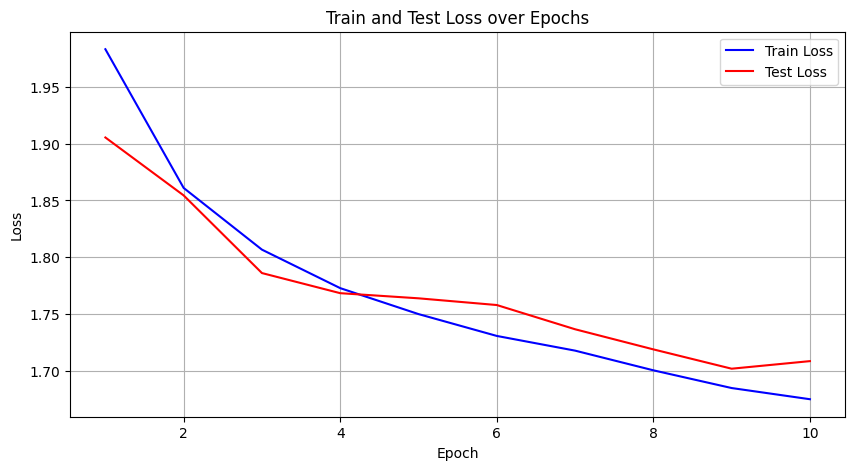

In [66]:
# Plot losses
plot_losses(epochs, train_losses, test_losses)